In [2]:
import utility_functions as uf
from pathlib import Path
import numpy as np
import re
import pylab as pl
from numpy.testing.decorators import skipif
import mvpa2.suite as mvpa
from mvpa2.measures import rsa

In [3]:
# Wider Output
np.set_printoptions(edgeitems=20)

# Project Directory
project_dir = Path.cwd().parents[0]

# BOLD Files Directory
data_dir = project_dir.joinpath("data", "studyforrest-data-aligned")
if data_dir.is_dir():
    data_dir = project_dir.joinpath("data", "studyforrest-data-aligned")
    print("BOLD Files Directory found: \n {}\n".format(data_dir))
else:
    print("There is something wrong with the Folder Structure of the BOLD Files\n")

# Anno Files Directory
anno_dir = project_dir.joinpath("data", "studyforrest-data-annotations")
if anno_dir.is_dir():
    anno_dir = project_dir.joinpath("data", "studyforrest-data-annotations")
    print("Annotation Files Directory found: \n {}\n".format(anno_dir))
else:
    print("There is something wrong with the Folder Structure of the Annotation Files\n")

BOLD Files Directory found: 
 /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-aligned

Annotation Files Directory found: 
 /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-annotations



In [4]:
# Get Participant Files
ao_files = uf.get_files(data_dir, '*aomovie*nii.gz')
av_files = uf.get_files(data_dir, '*avmovie*nii.gz')

# Get Annotation Files
ao_anno_files = uf.get_files(anno_dir, '*emotions*ao*run*.tsv')
av_anno_files = uf.get_files(anno_dir, '*emotions*av*run*.tsv')

# Check if all participant files are available
if (len(ao_files) == 112 and len(av_files) == 120):
    print("BOLD Files Availability Test: \n all Bold Files are available\n")
elif (len(ao_files) != 112 or len(av_files) != 120):
    if (len(ao_files) != 112):
        print("""BOLD Files Availability Test:
              you are missing BOLD Files of the AO-Movie Runs\n""")
    elif (len(av_files) != 120):
        print("""BOLD Files Availability Test:
              you are missing BOLD Files of the AV-Movie Runs\n""")

# Check if all annotation files are available
if (len(ao_anno_files) == 8 and len(av_anno_files) == 8):
    print("Annotation Files Availability Test: \n all Annotation Files are available\n")
elif (len(ao_anno_files) != 8 or len(av_anno_files) != 8):
    if (len(ao_anno_files) != 8):
        print("""Annotation Files Availability Test:
        you are missing Annotation Files of the AO-Movie Runs\n""")
    elif (len(av_anno_files) != 8):
        print("""Annotation Files Availability Test:
        you are missing Annotation Files of the AV-Movie Runs\n""")

BOLD Files Availability Test: 
 all Bold Files are available

Annotation Files Availability Test: 
 all Annotation Files are available



In [6]:
## MVPA (GLM Estimates)
    # useful when: multiple concurrent signals are overlapping in time, such as in 
    # fast event-related designs
    # GLM estimates instead of raw data
    
# Create Datset
mask_files = uf.get_files(project_dir, '*association*.nii.gz')
mask = mask_files[0]
targets = ['FORREST', 'MRSGUMP', 'FORRESTVO', 'FORRESTJR', 'BUBBA', 'DAN', 'JENNY']
ds = uf.preprocess_datasets(ao_files[0], mask=mask, detrending=True, use_zscore=True,
                            use_events=True, anno_dir=anno_dir, use_glm_estimates=True,
                            targets=targets, event_offset=2, event_dur=6)

print("This is the Dataset that will be used in the following Analysis:")
print("{}\n".format(ds))

print("Used mask file: \n{}\n".format(mask))
print(ds.sa)
print(ds.fa)
print(ds.a)

print("\nGLM Estimates were computed for the following targets: {}\n".format(ds.sa.targets))

# cross-validation Analysis with a chosen Classifier
clf = mvpa.kNN(k=1, dfx=mvpa.one_minus_correlation, voting='majority')
cv = mvpa.CrossValidation(clf, mvpa.NFoldPartitioner(attr='chunks'))
# cv_glm = cv(ds)
# print('%.2f' % np.mean(cv_glm))

This is the Dataset that will be used in the following Analysis:
<Dataset: 4x96888@float64, <sa: regressors,targets>, <fa: voxel_indices>, <a: add_regs,imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>>

Used mask file: 
/home/arkani/Desktop/studyforrest_speaker_recognition/data/speakers_association-test_z_FDR_0.01.nii.gz

<SampleAttributesCollection: regressors,targets>
<FeatureAttributesCollection: voxel_indices>
<DatasetAttributesCollection: add_regs,imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>

GLM Estimates were computed for the following targets: ['FORREST' 'FORRESTVO' 'JENNY' 'MRSGUMP']



In [10]:
## MVPA (raw Signal)
# Create Datset
mask_files = uf.get_files(project_dir, '*association*.nii.gz')
mask = mask_files[0]
targets = ['FORREST', 'MRSGUMP', 'FORRESTVO', 'FORRESTJR', 'BUBBA', 'DAN', 'JENNY']
ds = uf.preprocess_datasets(ao_files[0], mask=mask, detrending=True, use_zscore=True,
                            use_events=True, anno_dir=anno_dir, use_glm_estimates=False,
                            targets=targets, event_offset=2, event_dur=6)

print("This is the Dataset that will be used in the following Analysis:")
print("{}\n".format(ds))

print("Used mask file: \n{}\n".format(mask))
print(ds.sa)
print(ds.fa)
print(ds.a)

print("\nThe following events will be included: {}\n".format(ds.sa.targets))

# cross-validation analysis with a chosen classifier
sclf = mvpa.SplitClassifier(mvpa.LinearCSVMC(), enable_ca=['stats'])
sensana = sclf.get_sensitivity_analyzer()
# sens = sensana(ds)
# print(sens)

This is the Dataset that will be used in the following Analysis:
<Dataset: 24x387552@float64, <sa: chunks,duration,event_onsetidx,onset,orig_duration,orig_offset,orig_onset,participant,targets,time_coords,time_indices>, <fa: event_offsetidx,voxel_indices>, <a: ...>

Used mask file: 
/home/arkani/Desktop/studyforrest_speaker_recognition/data/speakers_association-test_z_FDR_0.01.nii.gz

<SampleAttributesCollection: chunks,duration,event_onsetidx,onset,orig_duration,orig_offset,orig_onset,participant,targets,time_coords,time_indices>
<FeatureAttributesCollection: event_offsetidx,voxel_indices>
<DatasetAttributesCollection: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>

The following events will be included: ['MRSGUMP' 'MRSGUMP' 'MRSGUMP' 'FORRESTVO' 'MRSGUMP' 'MRSGUMP' 'MRSGUMP'
 'MRSGUMP' 'MRSGUMP' 'FORRESTVO' 'FORRESTVO' 'FORRESTVO' 'MRSGUMP'
 'FORREST' 'FORRESTVO' 'FORREST' 'FORRESTVO' 'FORRESTVO' 'FORRESTVO'
 'FORRESTVO' 'JENNY' 'JENNY' 'JENNY' 'FORRESTVO']



This is the Dataset that will be used in the following Analysis:
<Dataset: 24x387552@float64, <sa: chunks,duration,event_onsetidx,onset,orig_duration,orig_offset,orig_onset,participant,targets,time_coords,time_indices>, <fa: event_offsetidx,voxel_indices>, <a: ...>

Used mask file: 
/home/arkani/Desktop/studyforrest_speaker_recognition/data/speakers_association-test_z_FDR_0.01.nii.gz

<SampleAttributesCollection: chunks,duration,event_onsetidx,onset,orig_duration,orig_offset,orig_onset,participant,targets,time_coords,time_indices>
<FeatureAttributesCollection: event_offsetidx,voxel_indices>
<DatasetAttributesCollection: imgaffine,imghdr,imgtype,mapper,voxel_dim,voxel_eldim>

The following events will be included: ['MRSGUMP' 'MRSGUMP' 'MRSGUMP' 'FORRESTVO' 'MRSGUMP' 'MRSGUMP' 'MRSGUMP'
 'MRSGUMP' 'MRSGUMP' 'FORRESTVO' 'FORRESTVO' 'FORRESTVO' 'MRSGUMP'
 'FORREST' 'FORRESTVO' 'FORREST' 'FORRESTVO' 'FORRESTVO' 'FORRESTVO'
 'FORRESTVO' 'JENNY' 'JENNY' 'JENNY' 'FORRESTVO']



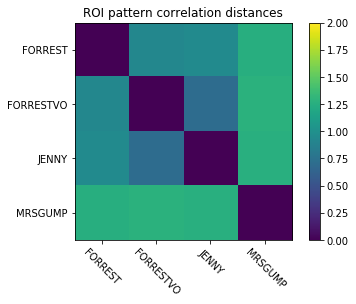

In [13]:
## RSA
# Create Datset
mask_files = uf.get_files(project_dir, '*association*.nii.gz')
mask = mask_files[0]
targets = ['FORREST', 'MRSGUMP', 'FORRESTVO', 'FORRESTJR', 'BUBBA', 'DAN', 'JENNY']
ds = uf.preprocess_datasets(ao_files[0], mask=mask, detrending=True, use_zscore=True,
                            use_events=True, anno_dir=anno_dir, use_glm_estimates=False, 
                            targets=targets, event_offset=2, event_dur=6)

print("This is the Dataset that will be used in the following Analysis:")
print("{}\n".format(ds))

print("Used mask file: \n{}\n".format(mask))
print(ds.sa)
print(ds.fa)
print(ds.a)

print("\nThe following events will be included: {}\n".format(ds.sa.targets))

# ROI RSA
mtgs = mvpa.mean_group_sample(['targets'])
mtds = mtgs(ds)
dsm = rsa.PDist(square=True)
res = dsm(mtds)

## Graphical Results
def plot_mtx(mtx, labels, title):
    pl.figure()
    pl.imshow(mtx, interpolation='nearest')
    pl.xticks(range(len(mtx)), labels, rotation=-45)
    pl.yticks(range(len(mtx)), labels)
    pl.title(title)
    pl.clim((0, 2))
    pl.colorbar()

plot_mtx(res, mtds.sa.targets, 'ROI pattern correlation distances')
pl.show()

In [ ]:
# kürzere code lines (pyflakes)

# mehr tests in funktionen einbauen

# wichtige directories hierbei
    # /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/
    # /usr/share/data/
        # hier liegen die MNI etc Templates
        
# Vorgehensweise
    # jeden einzelnen Run mit dem jeweiligen Template für den Run in den Gruppenspace
        # sind momentan alle nur innerhalb der VP aligned
    # vom Gruppenspace in den MNI-Space
    # dann funktioniert die brain mask von neurosynth direkt (MNI)


# Bsp. BOLD: /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-aligned/sub-01/in_bold3Tp2/sub-01_task-aomovie_run-1_bold.nii.gz
# Bsp. Warp: /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/subj2tmpl_warp.nii.gz

# GrpBrainRef: /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/head.nii.gz
# MNIBrainRef: /usr/share/data/fsl-mni152-templates/MNI152_T1_2mm_brain.nii.gz

# Warp2GrpSpace: /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/subj2tmpl_warp.nii.gz
    # different for every subject
# Warp2MNISpace: /home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/templates/grpbold3Tp2/in_mni/brain_12dof.nii.gz

# VP1_AO_Run1_GrpSpace: /home/arkani/Desktop/VP1_AO_Run1_GrpSpace.nii.gz
# VP1_AO_Run1_MNISpace: /home/arkani/Desktop/VP1_AO_Run1_MNISpace.nii.gz

In [ ]:
# To Group Space
applywarp --ref="/home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/head.nii.gz" --in="/home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-aligned/sub-01/in_bold3Tp2/sub-01_task-aomovie_run-1_bold.nii.gz" --out="/home/arkani/Desktop/warp_test.nii.gz" --warp="/home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/subj2tmpl_warp.nii.gz"

# Straight to MNI?
applywarp --ref="/usr/share/data/fsl-mni152-templates/MNI152_T1_2mm_brain.nii.gz" --in="/home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-aligned/sub-01/in_bold3Tp2/sub-01_task-aomovie_run-1_bold.nii.gz" --out="straight_2_mni_test" --warp="/home/arkani/Desktop/studyforrest_speaker_recognition/data/studyforrest-data-templatetransforms/sub-01/bold3Tp2/in_grpbold3Tp2/subj2tmpl_warp.nii.gz" --premat="brain_12dof.nii.gz"